## Project done by:- Pratik Datey

# Mercedes-Benz Greener Manufacturing 

### DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench.

Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

In [1]:
import numpy as np
import pandas as pd

### Test Dataset

In [2]:
test_data=pd.read_csv('test.csv')
test_data

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,aj,h,as,f,d,aa,j,e,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,t,aa,ai,d,d,aa,j,y,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,y,v,as,f,d,aa,d,w,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,ak,v,as,a,d,aa,c,q,0,...,0,0,1,0,0,0,0,0,0,0


In [3]:
test_data.shape

(4209, 377)

In [4]:
test_data.dtypes

ID       int64
X0      object
X1      object
X2      object
X3      object
         ...  
X380     int64
X382     int64
X383     int64
X384     int64
X385     int64
Length: 377, dtype: object

### Train Dataset

In [5]:
train_data=pd.read_csv('train.csv')
train_data

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_data.shape

(4209, 378)

In [7]:
train_data.dtypes

ID        int64
y       float64
X0       object
X1       object
X2       object
         ...   
X380      int64
X382      int64
X383      int64
X384      int64
X385      int64
Length: 378, dtype: object

## 1) If for any column(s), the variance is equal to zero, then you need to remove those variable(s)

###  Test Dataset

In [8]:
print("total no. of variables:-",len(test_data.var()[test_data.var()==0]))
print(test_data.var()[test_data.var()==0])

total no. of variables:- 5
X257    0.0
X258    0.0
X295    0.0
X296    0.0
X369    0.0
dtype: float64


In [9]:
test_data=test_data.drop(test_data[['X257','X258','X295','X296','X369']],axis=1)

In [10]:
test_data

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,aj,h,as,f,d,aa,j,e,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,t,aa,ai,d,d,aa,j,y,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,y,v,as,f,d,aa,d,w,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,ak,v,as,a,d,aa,c,q,0,...,0,0,1,0,0,0,0,0,0,0


In [11]:
test_data.shape

(4209, 372)

###  Train Dataset

In [12]:
print("total no. of variables:-",len(train_data.var()[train_data.var()==0]))
print(train_data.var()[train_data.var()==0])

total no. of variables:- 12
X11     0.0
X93     0.0
X107    0.0
X233    0.0
X235    0.0
X268    0.0
X289    0.0
X290    0.0
X293    0.0
X297    0.0
X330    0.0
X347    0.0
dtype: float64


In [13]:
train_data=train_data.drop(train_data[['X11','X93','X107','X233','X235','X268','X289','X290','X293','X297','X330','X347']],axis=1)

In [14]:
train_data

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


In [15]:
train_data.shape

(4209, 366)

## 2] Check for null and unique values for test and train sets.

###  Test Dataset

In [16]:
test_data.isna().sum().any()

False

In [17]:
test_data.nunique()


ID      4209
X0        49
X1        27
X2        45
X3         7
        ... 
X380       2
X382       2
X383       2
X384       2
X385       2
Length: 372, dtype: int64

###  Train Dataset

In [18]:
train_data.isna().sum().any()

False

In [19]:
train_data.nunique()


ID      4209
y       2545
X0        47
X1        27
X2        44
        ... 
X380       2
X382       2
X383       2
X384       2
X385       2
Length: 366, dtype: int64

## 3] Apply label encoder.

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le=LabelEncoder()

### Test Dataset

In [22]:
test_data

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,aj,h,as,f,d,aa,j,e,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,t,aa,ai,d,d,aa,j,y,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,y,v,as,f,d,aa,d,w,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,ak,v,as,a,d,aa,c,q,0,...,0,0,1,0,0,0,0,0,0,0


In [23]:
test_data=test_data.drop(['ID'],axis=1)


In [24]:
test_data

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,az,v,n,f,d,t,a,w,0,0,...,0,0,0,1,0,0,0,0,0,0
1,t,b,ai,a,d,b,g,y,0,0,...,0,0,1,0,0,0,0,0,0,0
2,az,v,as,f,d,a,j,j,0,0,...,0,0,0,1,0,0,0,0,0,0
3,az,l,n,f,d,z,l,n,0,0,...,0,0,0,1,0,0,0,0,0,0
4,w,s,as,c,d,y,i,m,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,aj,h,as,f,d,aa,j,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4205,t,aa,ai,d,d,aa,j,y,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,y,v,as,f,d,aa,d,w,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,ak,v,as,a,d,aa,c,q,0,0,...,0,0,1,0,0,0,0,0,0,0


In [25]:
test_data=test_data.apply(le.fit_transform)

In [26]:
test_data

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,21,23,34,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,6,9,17,5,3,1,9,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4205,42,1,8,3,3,1,9,24,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,47,23,17,5,3,1,3,22,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,7,23,17,0,3,1,2,16,0,0,...,0,0,1,0,0,0,0,0,0,0


### Train Dataset

In [27]:
train_data

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


In [28]:
train=train_data.drop(train_data[['ID','y']],axis=1)

In [29]:
train.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,k,v,at,a,d,u,j,o,0,0,...,0,0,1,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
train=train.apply(le.fit_transform)
train.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4] Perform dimensionality reduction.

### Train Dataset

In [31]:
train.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
x=train
x.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
y=train_data.y
y

0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
         ...  
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 4209, dtype: float64

In [34]:
print(x.shape)
print(y.shape)

(4209, 364)
(4209,)


### Performing PCA

In [35]:
from sklearn.decomposition import PCA


In [36]:
pca=PCA(n_components=.97)


In [37]:
pca.fit(x,y)

PCA(n_components=0.97)

In [38]:
x_trans=pca.fit_transform(x)
print(np.round(x_trans,2))

[[  0.61  -0.13  15.62 ...   3.82   1.54  -0.65]
 [  0.57   1.56  17.91 ...  -0.8    0.81  -0.79]
 [ 16.2   12.29  17.63 ...   0.83   1.58  -0.61]
 ...
 [ 29.    14.86  -7.75 ...   3.4   -0.25   0.26]
 [ 22.97   1.68  -9.03 ...  -2.7    1.72   2.24]
 [-17.28  -9.95  -3.72 ...   1.25   0.8    0.81]]


In [39]:
x_trans.shape

(4209, 9)

In [40]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score
from math import sqrt

In [41]:
train_x,test_x,train_y,test_y = train_test_split(x_trans,y,test_size=.3,random_state=7)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)


(2946, 9)
(2946,)
(1263, 9)
(1263,)


In [75]:
xgb_reg = xgb.XGBRegressor()

In [76]:
model = xgb_reg.fit(train_x,train_y)

In [77]:
pred=model.predict(test_x)
pred

array([106.911476,  87.72877 , 110.87875 , ..., 105.76023 ,  91.524666,
        95.39546 ], dtype=float32)

In [78]:
r2_score(pred,test_y)

-0.5462438102041238

In [79]:
test_y.values

array([112.07,  86.86,  97.57, ..., 105.43,  86.91,  92.56])

In [74]:
print('RMSE = ',sqrt(mean_squared_error(model.predict(test_x),test_y)))

RMSE =  11.43727530874399


### 5] Predict your test_df values using XGBoost.

In [80]:
test_data.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,21,23,34,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


In [81]:
pca.fit(test_data)

PCA(n_components=0.97)

In [82]:
test_data_trans=pca.transform(test_data)
test_data_trans

array([[ 14.58336173,  14.16672549,  13.53857605, ...,  -2.02613083,
          2.53369118,  -1.08222714],
       [-15.25161263,  -7.73675622,  -7.45495093, ...,   4.00684487,
          1.8397268 ,   0.60035628],
       [ 11.85646482,  -1.68017313,  -9.98961457, ...,  -0.90475969,
          0.73642678,  -0.07992895],
       ...,
       [-13.44644012,   3.28858211,  -6.85236379, ...,  -2.54253101,
         -0.88554736,  -2.62905183],
       [ 24.92612306,  -4.89888665, -10.16941016, ...,   3.81211184,
         -1.87617566,  -0.25064812],
       [-15.38430983,  -7.7342545 , -15.49301063, ...,   0.42170531,
          1.22577446,   1.75652444]])

In [83]:
test_predict=model.predict(test_data_trans)
test_predict

array([ 75.41555,  89.29258,  81.64661, ..., 108.80828, 111.70862,
        97.12959], dtype=float32)

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

D:\New folder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\New folder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


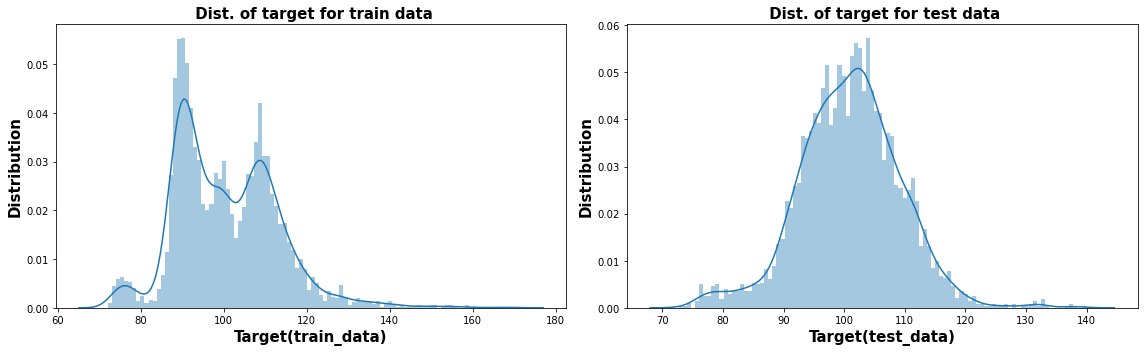

In [85]:
fig,ax=plt.subplots(1,2,figsize=(16,5))
train_plot=sns.distplot(y[y<200],bins=100,ax=ax[0])
train_plot.set_xlabel('Target(train_data)', weight='bold', size=15)
train_plot.set_ylabel('Distribution', weight='bold', size=15)
train_plot.set_title(' Dist. of target for train data', weight='bold', size=15)



test_plot=sns.distplot(test_predict[test_predict<200],bins=100,ax=ax[1])
test_plot.set_xlabel('Target(test_data)', weight='bold', size=15)
test_plot.set_ylabel('Distribution', weight='bold', size=15)
test_plot.set_title(' Dist. of target for test data', weight='bold', size=15)


plt.tight_layout()